AVOCADO PRICE PREDICTION

1. DATA UNDERSTANDING

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv( "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv",index_col=[0])

In [71]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [72]:
df.shape

(16468, 13)

In [73]:
print(df.isnull().sum())

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64


REMOVING ALL NULL VALUE FROM DATA SET

In [74]:
df=df.dropna()

In [75]:
print(df.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [76]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1517 entries, 0.0 to 14.0
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [78]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [79]:
df['Date']

0.0     27-12-2015
1.0     20-12-2015
2.0     13-12-2015
3.0     06-12-2015
4.0     29-11-2015
           ...    
10.0    16-10-2016
11.0    09-10-2016
12.0    02-10-2016
13.0    25-09-2016
14.0    18-09-2016
Name: Date, Length: 1517, dtype: object

In [80]:
# new data frame with split value columns
new = df["Date"].str.split("-", n = 1, expand = True)


df["Date"]= new[0]

df["Month"]= new[1]
#df["year"]= new[2]

new2 = df["Month"].str.split("-", n = 1, expand = True)

df["Month"]= new2[0]
df["year"]= new2[1]

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12
1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12
2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12
3.0,06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12
4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10
11.0,09,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,10
12.0,02,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,10
13.0,25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,09


In [81]:
df['Date']

0.0     27
1.0     20
2.0     13
3.0     06
4.0     29
        ..
10.0    16
11.0    09
12.0    02
13.0    25
14.0    18
Name: Date, Length: 1517, dtype: object

In [82]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['year']=df['year'].astype(int)

In [83]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
Date,1.000000,0.092531,-0.022423,-0.018394,-0.032709,-0.014611,-0.009035,-0.003583,-0.038890,0.009174,0.023543,0.034279
AveragePrice,0.092531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.066859
Total Volume,-0.022423,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.090520
4046,-0.018394,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.090647
4225,-0.032709,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.091329
4770,-0.014611,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.074855
Total Bags,-0.009035,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.081330
Small Bags,-0.003583,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.084376
Large Bags,-0.038890,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.062447
XLarge Bags,0.009174,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.049232


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1517 entries, 0.0 to 14.0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int32  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int32  
 12  region        1517 non-null   object 
 13  Month         1517 non-null   int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 160.0+ KB


# 2.EDA

In [85]:
print(df['region'].value_counts())

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

In [86]:
print(df['type'].value_counts())

conventional    1517
Name: type, dtype: int64


SINCE THERE IS ONLY VALUE IN TYPE REMOVING THAT COLUMN

In [87]:
df=df.drop('type',axis=1)

In [88]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany,12
1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany,12
2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany,12
3.0,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany,12
4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte,10
11.0,9,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte,10
12.0,2,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte,10
13.0,25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte,9


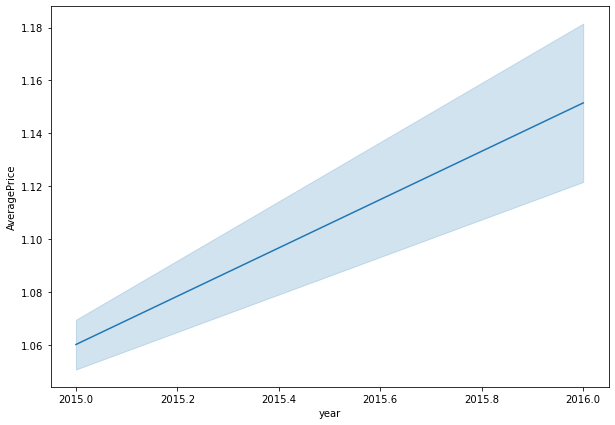

In [89]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='AveragePrice', data=df)
plt.show()

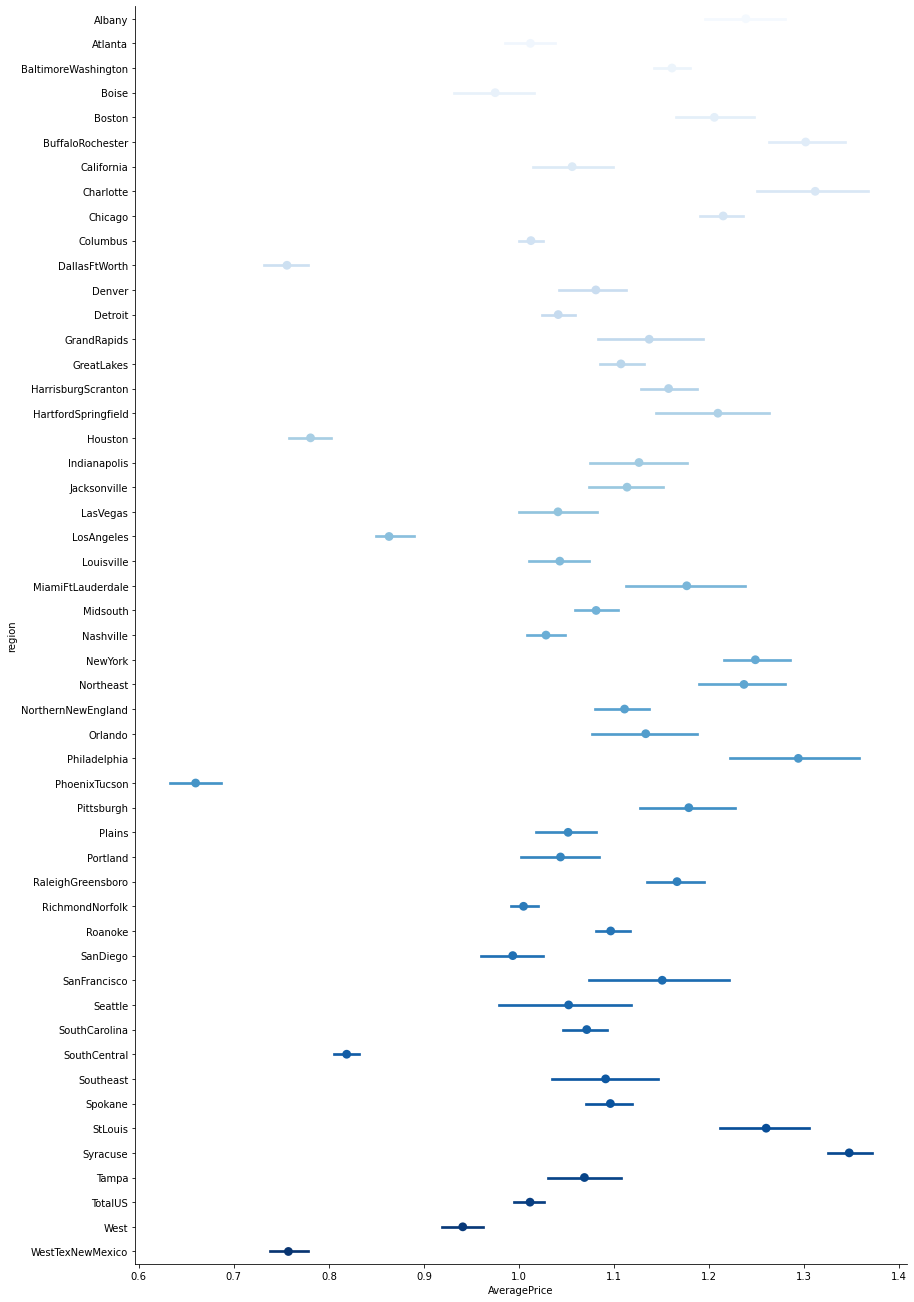

In [90]:
# Factorplot Display distribution of data across all level of category
sns.factorplot('AveragePrice','region',data=df,size=18,aspect=0.7,palette='Blues',join=False)

In [91]:
df_continuous=df.drop(columns='region')
df_catogorical=df['region']

<AxesSubplot:xlabel='Date', ylabel='count'>

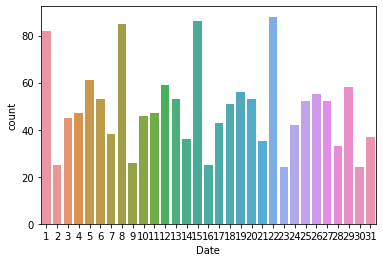

In [92]:
sns.countplot(df_continuous['Date'])

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

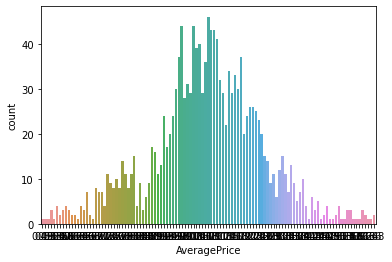

In [93]:
sns.countplot(df_continuous['AveragePrice'])

AVERAGE PRICE THE PREDITOR VARIABLE IS NORMALLY DISTRIBUTED

<AxesSubplot:xlabel='year', ylabel='count'>

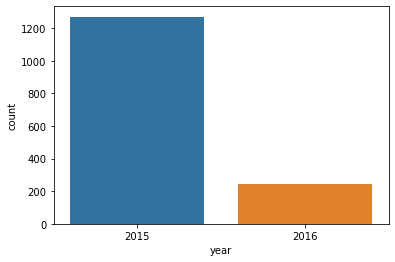

In [94]:
sns.countplot(x='year',data=df_continuous)

WE HAVE 2015 RECORDS ARE HIGHER THAN 2016 RECORDS

<AxesSubplot:xlabel='Month', ylabel='count'>

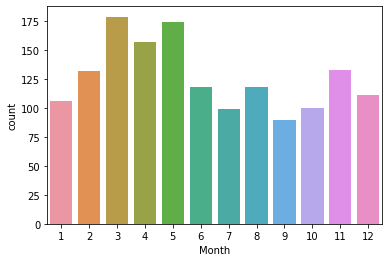

In [95]:
sns.countplot(x='Month',data=df_continuous)

ALL THE MONTHS ARE EQUALLY DISTRIBUTED i.e THERE IS NO SEASON FOR AVACADO SALES

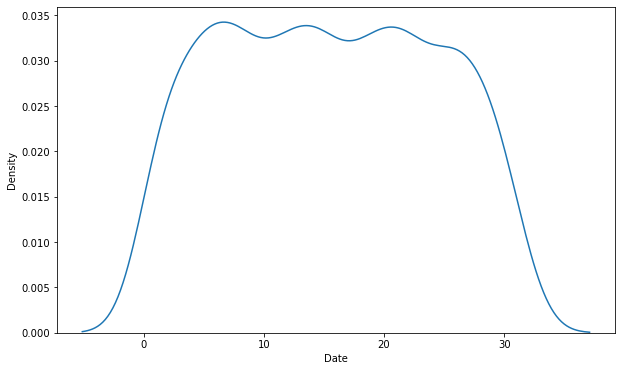

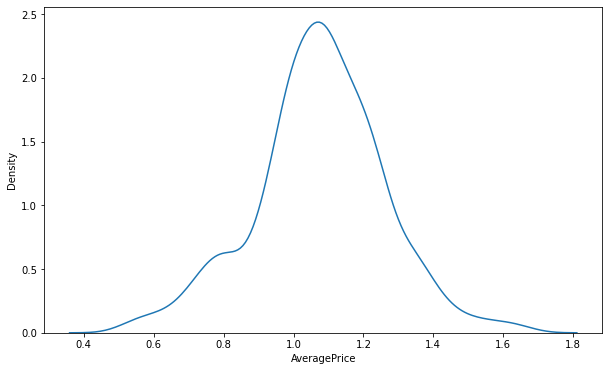

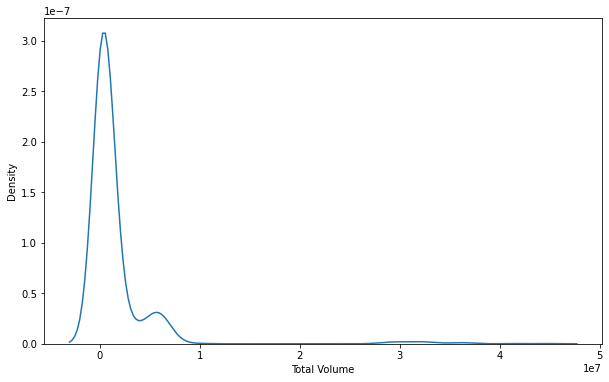

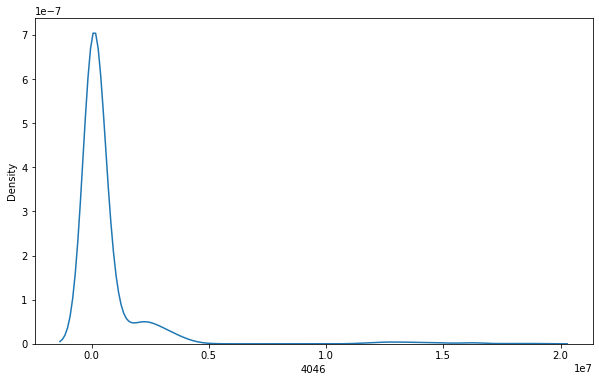

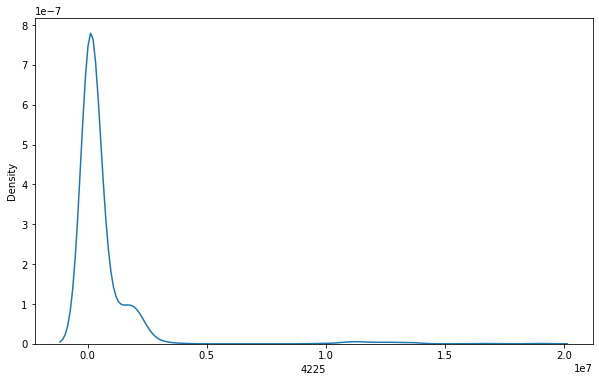

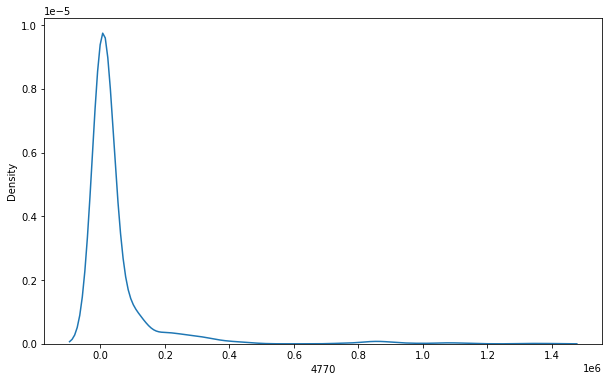

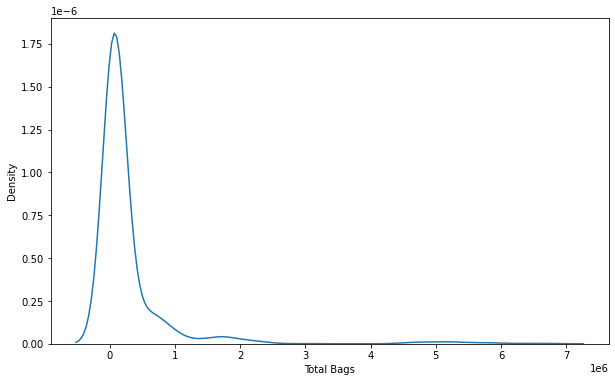

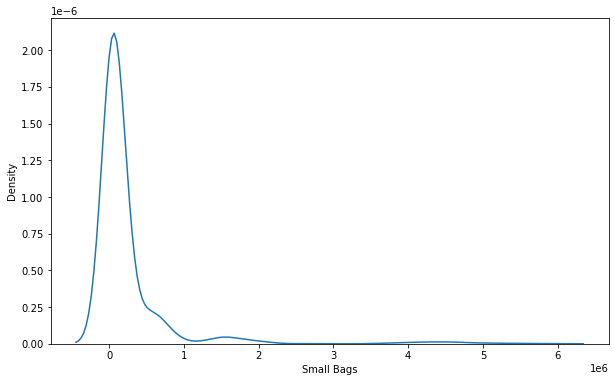

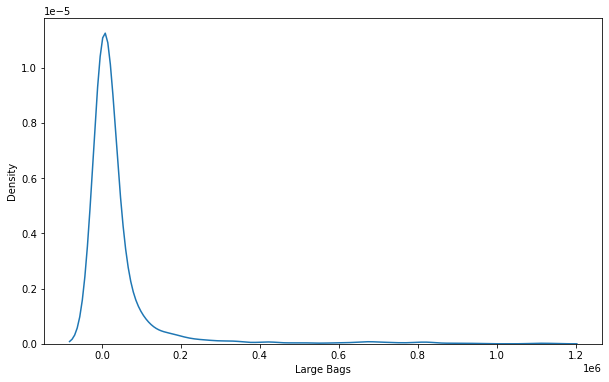

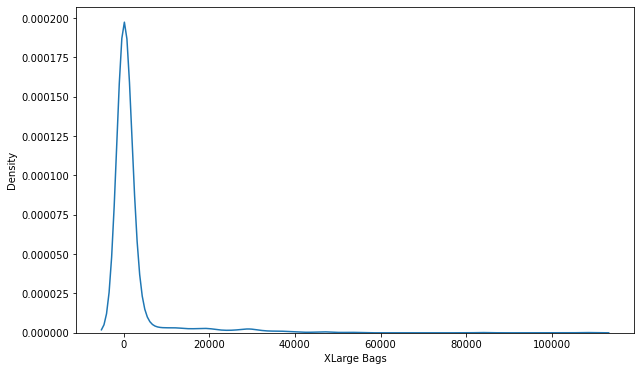

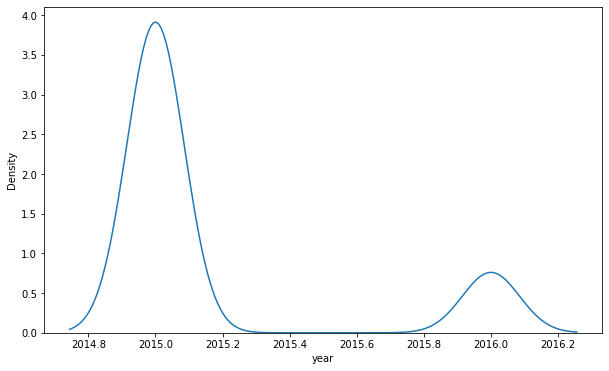

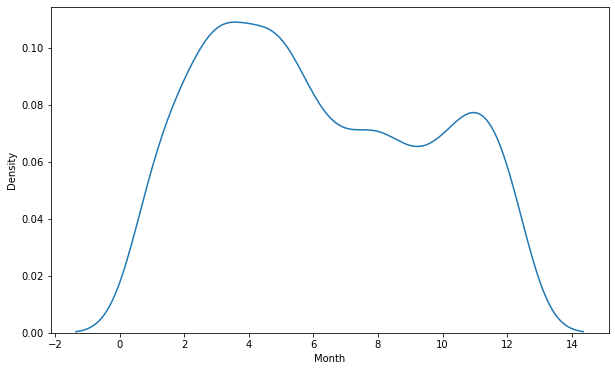

In [96]:
for i in df_continuous.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df_continuous[i])

NOT ALL THE DATA ARE NORMALLY DISTRIBUTED ONLY PREDICTOR "AVERAGE PRICE" IS NORMALLY DISTRIBUTED

THERE IS HIGH SKEWNESS PRESENT IN DATA WHICH NEED TO BE TREATED

In [97]:
df['AveragePrice'].describe()

count    1517.000000
mean        1.074990
std         0.188891
min         0.490000
25%         0.980000
50%         1.080000
75%         1.190000
max         1.680000
Name: AveragePrice, dtype: float64

PLOTING THE BOX PLOT TO SEE THE OUTLIERS PRESENT IN THE DATA

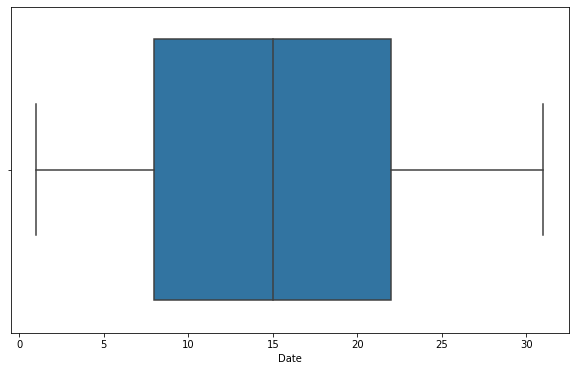

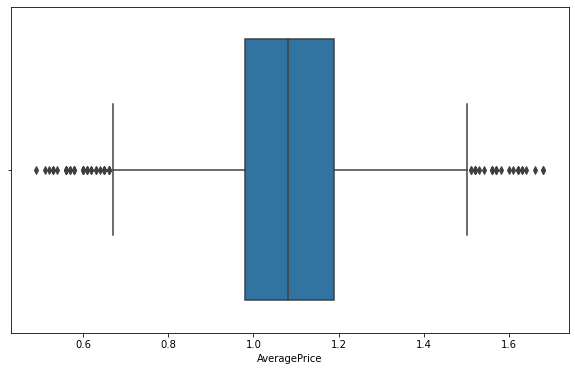

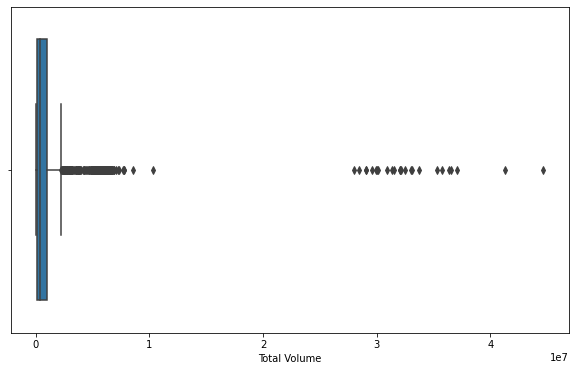

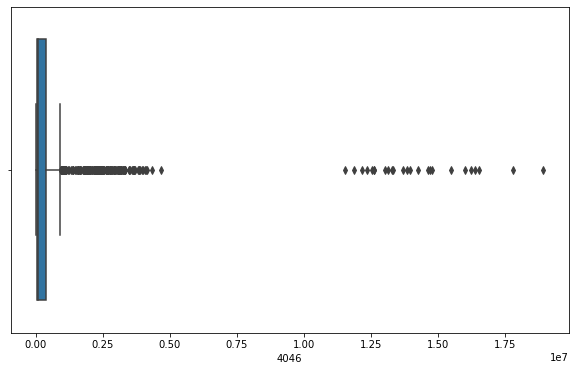

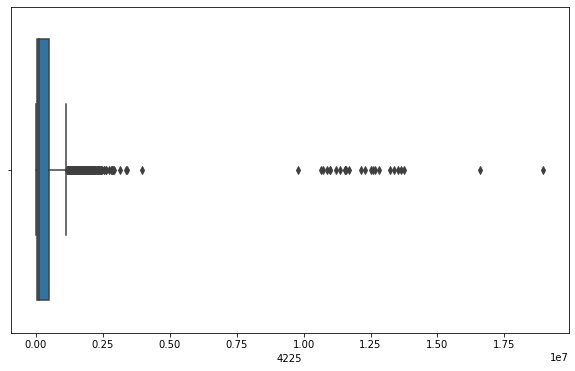

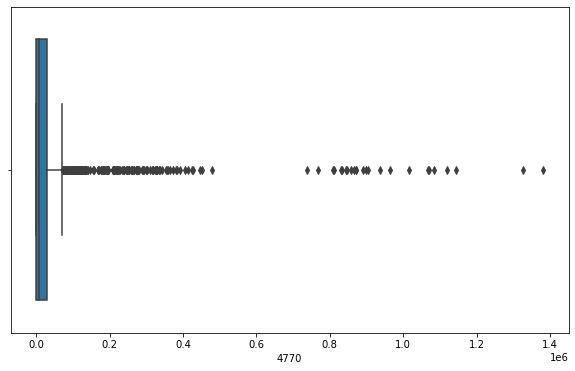

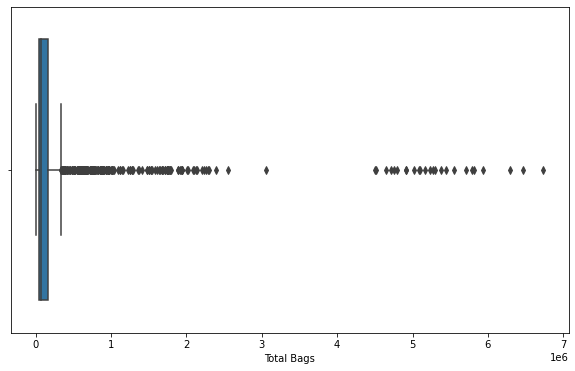

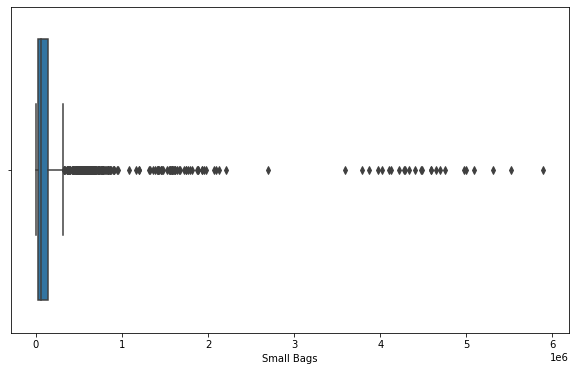

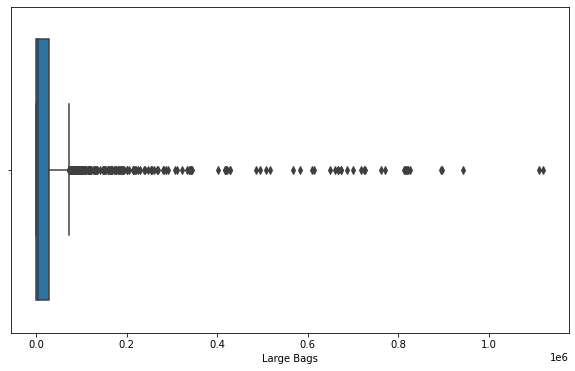

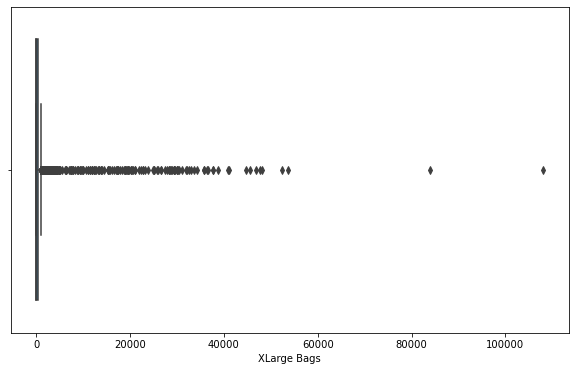

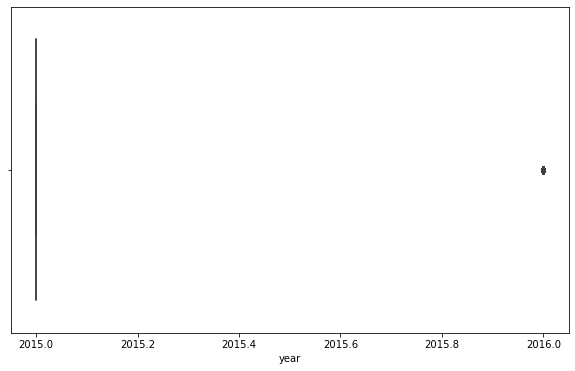

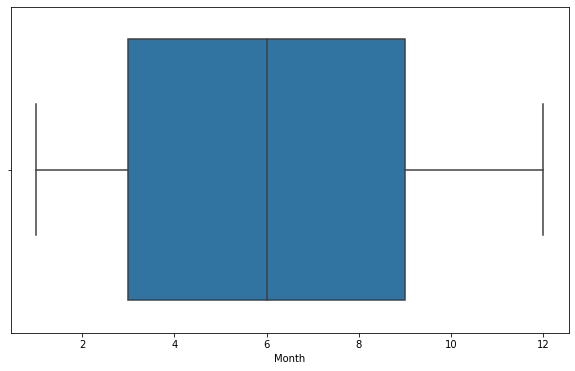

In [98]:
for i in df_continuous.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df_continuous[i])

OUTLIER IS HIGHLY PRESENT ALL THE DATA EXCEPT "AVERAGE PRICE"

THAT IS THE REASON FOR SKEWNESS

<AxesSubplot:xlabel='region', ylabel='count'>

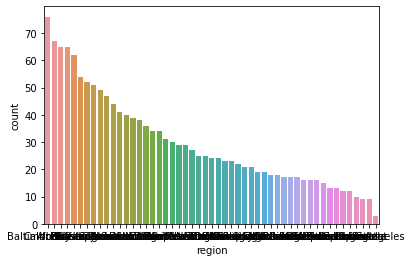

In [99]:
sns.countplot(x='region',data=df,order=df['region'].value_counts().index)

SOME OF THE STATE PRODUCE HIGH AVOCADO COMPARED TO OTHER STATES

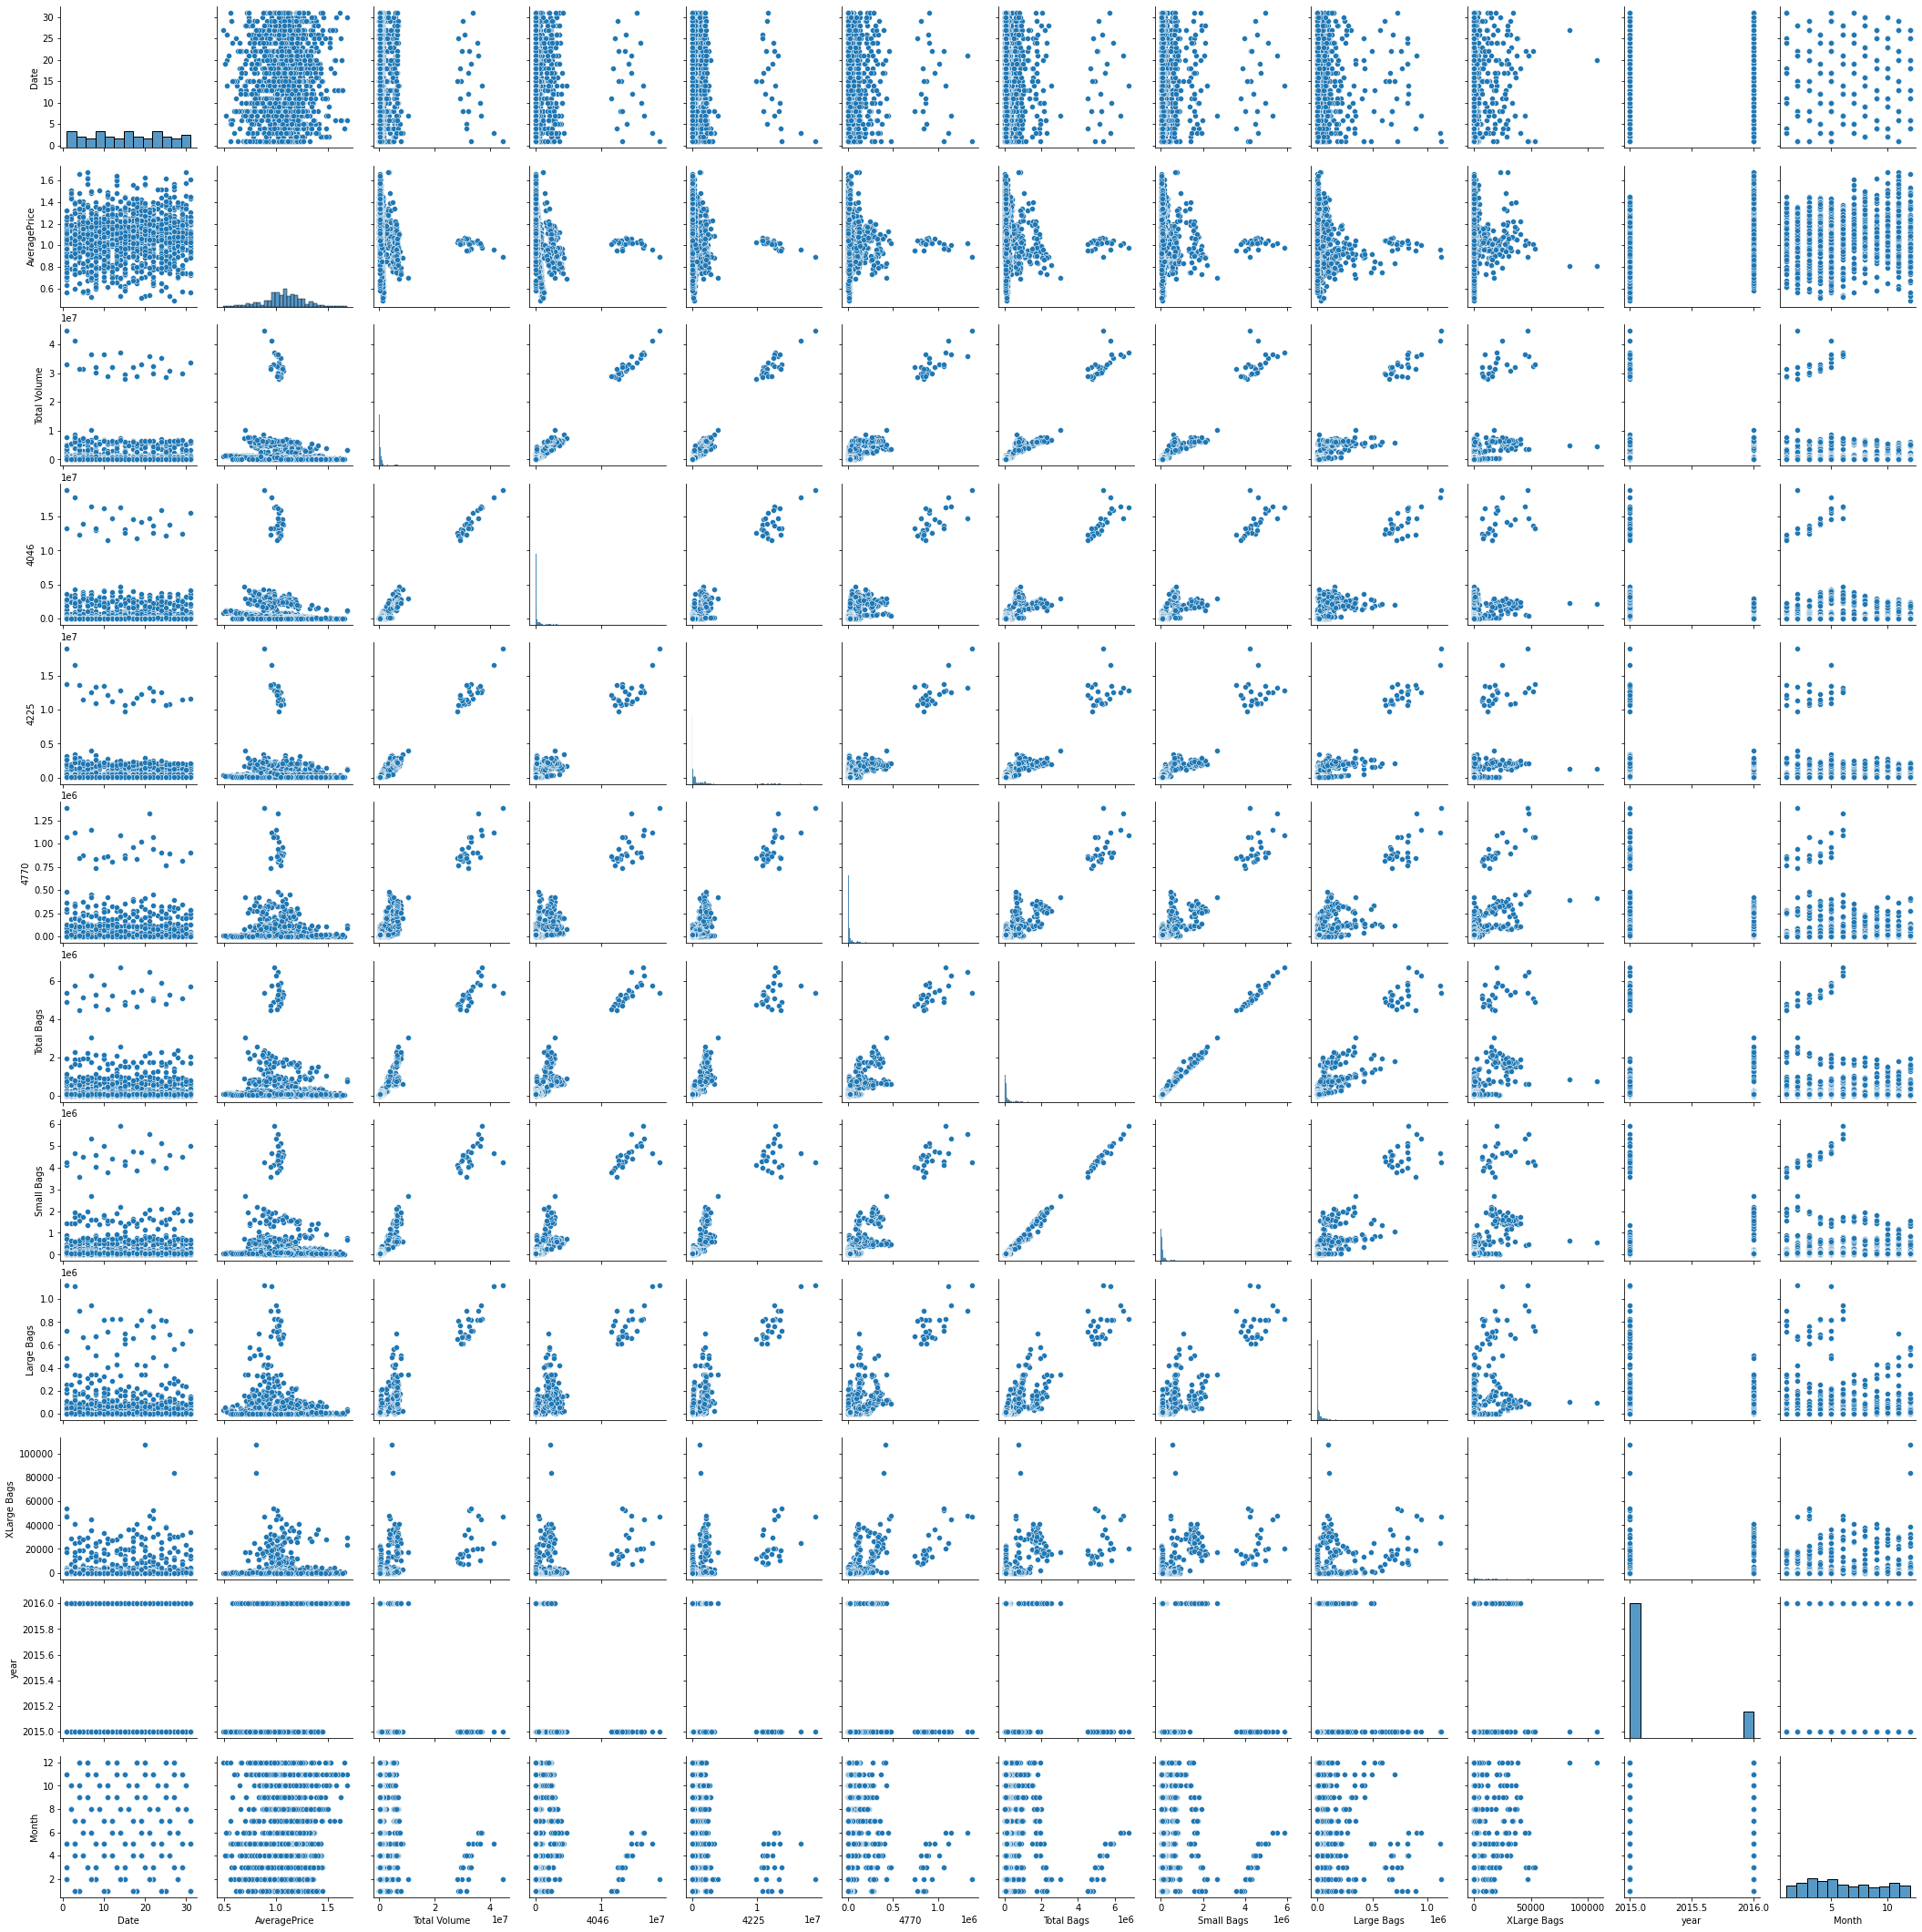

In [100]:
sns.pairplot(df_continuous)

<AxesSubplot:>

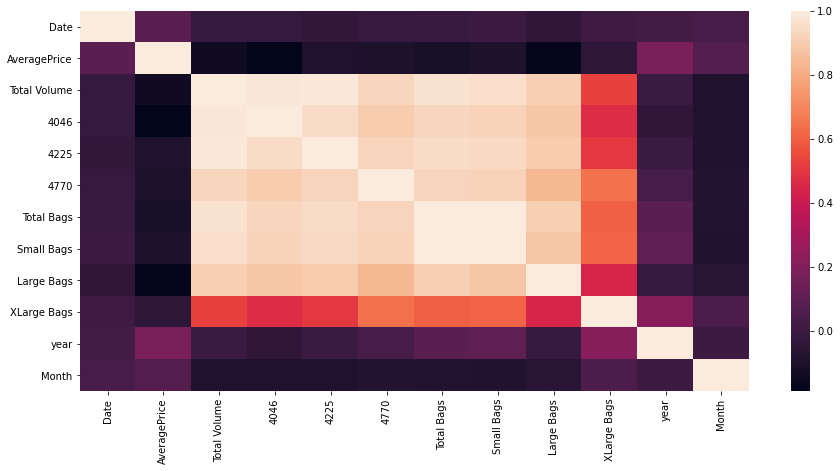

In [101]:
df_corr=df_continuous.corr()
plt.figure(figsize=[15,7])
sns.heatmap(df_corr)

*There is no column fairely correlated with Average price

4046,4225,4770,Total Volume are highly correlated with each other, that could be possible because they all are sold information

In [102]:
df.drop('Total Bags',axis=1,inplace=True)

In [103]:
df_corr["AveragePrice"]

Date            0.092531
AveragePrice    1.000000
Total Volume   -0.140470
4046           -0.190096
4225           -0.092084
4770           -0.100567
Total Bags     -0.111597
Small Bags     -0.097682
Large Bags     -0.177480
XLarge Bags    -0.048284
year            0.178683
Month           0.066859
Name: AveragePrice, dtype: float64

3.FEATURE ENGINEERING

Encoding

In [104]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])

In [105]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.233418
dtype: float64

skewness and outlier handling

In [106]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags','year']]=power_transform(df[['Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags','year']])

In [107]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
region          0.288146
Month           0.233418
dtype: float64

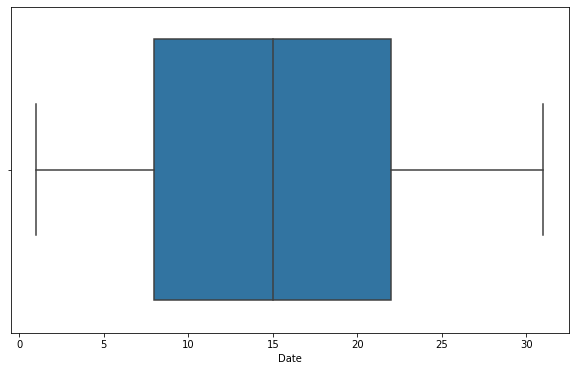

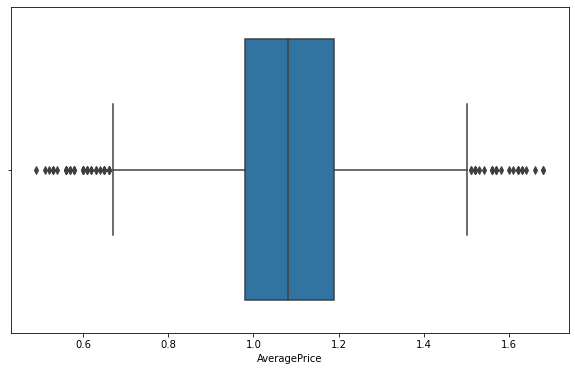

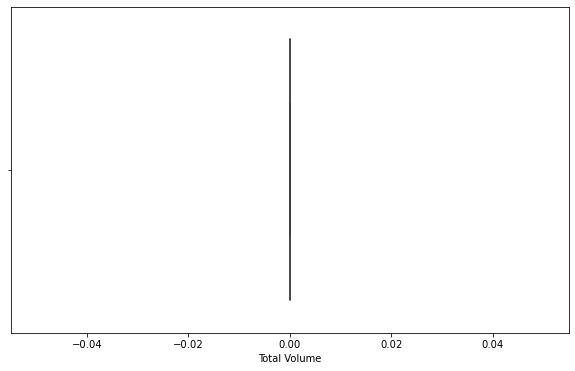

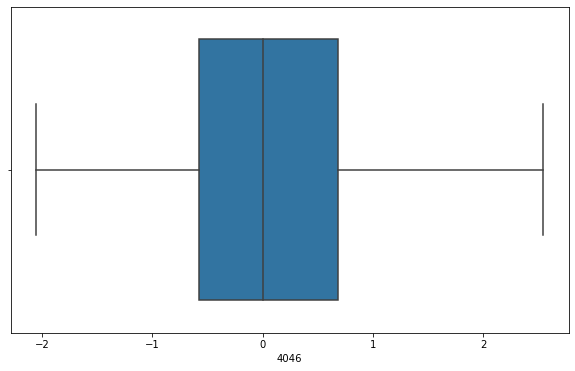

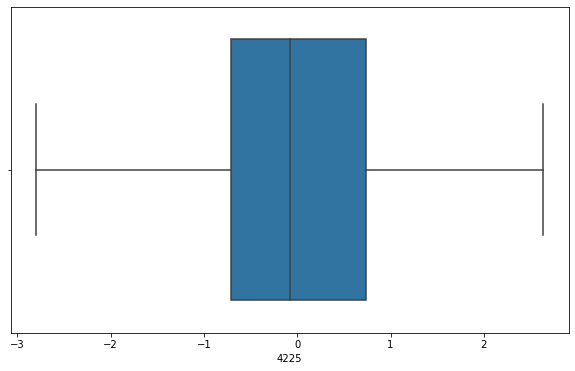

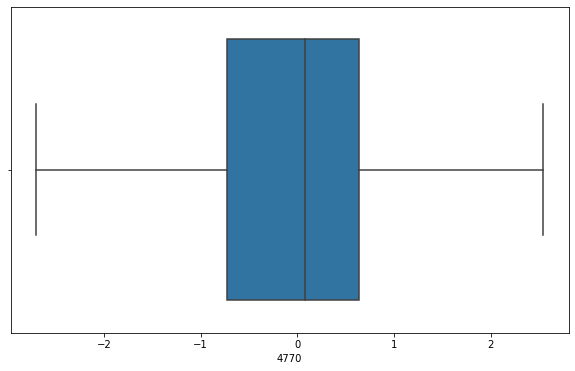

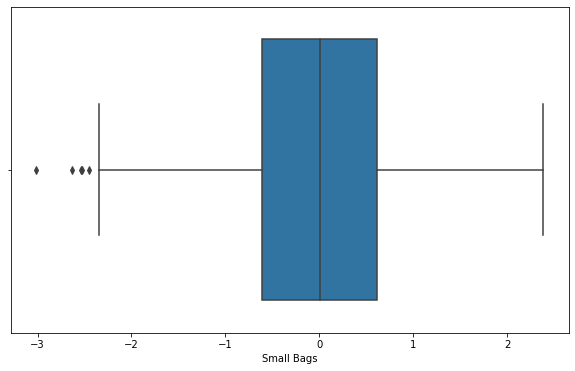

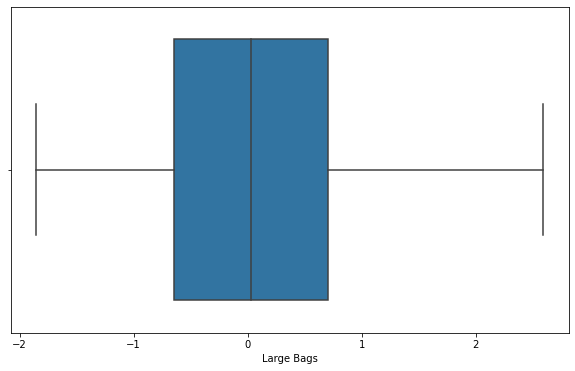

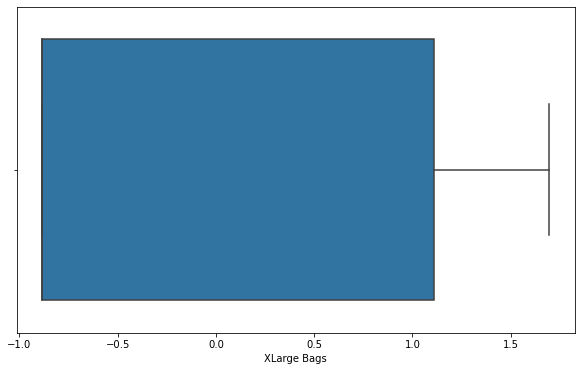

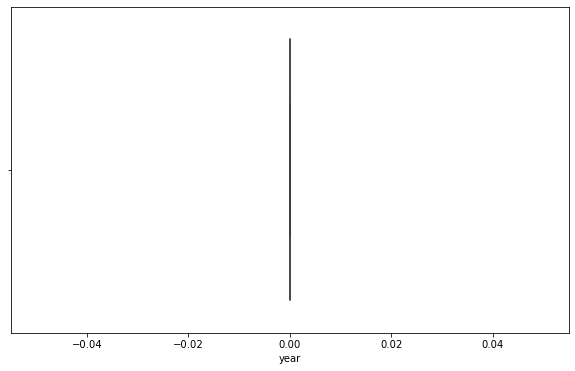

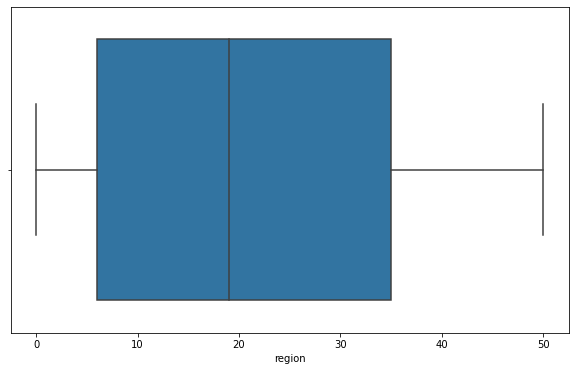

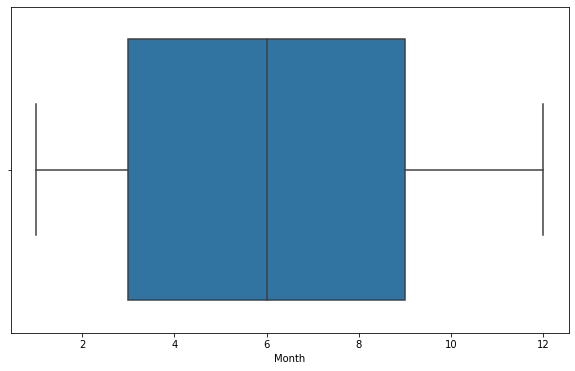

In [108]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])

outlier is removed

In [109]:
df.shape

(1517, 12)

In [110]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (1517, 12)
[[1.31347192 1.35048079        nan ...        nan 1.3143384  1.72065124]
 [0.51745786 1.45639674        nan ...        nan 1.3143384  1.72065124]
 [0.27855619 0.76783831        nan ...        nan 1.3143384  1.72065124]
 ...
 [1.52943542 2.14485045        nan ...        nan 0.88028586 1.13070256]
 [1.08603933 2.09189247        nan ...        nan 0.88028586 0.83572822]
 [0.29002527 1.88006056        nan ...        nan 0.88028586 0.83572822]]


In [111]:
threshold = 3
print(np.where(z > 3))

(array([ 154,  760, 1411, 1457, 1458], dtype=int64), array([6, 1, 1, 1, 1], dtype=int64))


In [112]:
after_zscore = df[(z < 3).all(axis=1)]

In [113]:
after_zscore.shape

(0, 12)

In [114]:
after_zscore.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Month


since z_score removes all the data from table this methord is not suggested

In [115]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
region          0.288146
Month           0.233418
dtype: float64

In [116]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
Month           0
dtype: int64

4.TEST TRAIN SPLIT

In [117]:
x= df.drop(columns='AveragePrice')
y= df['AveragePrice']

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

SCALING

In [119]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [120]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [121]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1213.000000,1213.0,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.0,1213.000000,1213.000000
mean,0.483539,0.0,0.449291,0.521484,0.489639,0.560767,0.416513,0.348745,0.0,0.426892,0.472457
std,0.292526,0.0,0.218545,0.185730,0.202378,0.186373,0.224553,0.393925,0.0,0.321905,0.307179
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.233333,0.0,0.323746,0.388915,0.345066,0.447070,0.269389,0.000000,0.0,0.120000,0.181818
50%,0.466667,0.0,0.449214,0.507016,0.504509,0.562381,0.419317,0.000000,0.0,0.380000,0.454545
75%,0.700000,0.0,0.598594,0.658708,0.630881,0.676789,0.573189,0.780939,0.0,0.720000,0.727273
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [122]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [123]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [124]:
predictions=lm.predict(x_test)

In [125]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error:  0.12363137237177298
Mean Squared Error:  0.02396289067737507
Root Mean Squared Error:  0.15479951769102857
Explained Variance Score:  0.324568305363061


FINDING BEST random_state

In [126]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 0.05869234531823064
least value 0 0.05869234531823064
1 -0.08505239731100378
least value 1 -0.08505239731100378
2 -0.08112769987627588
3 0.09958420916812183
4 0.16761302385106802
5 -0.008722563166416175
6 0.059454627688580564
7 0.0545204289547927
8 -0.0014500268888304468
9 0.011441575385571445
10 -0.009966502880179084
11 0.022346904645774712
12 0.027191731402176123
13 0.045422506860495426
14 0.06551916097003907
15 -0.009459567896720422
16 0.0016922732164696974
17 -0.01870600186569893
18 -0.0006038357454859478
19 0.027735056809280012
20 -0.02410541923763654
21 0.027992206611232473
22 -0.031204951968397898
23 -0.014177449965403044
24 0.01951088229773723
25 -0.03496007629083042
26 -0.003995992820822192
27 -0.03619418241478478
28 -0.04480475561520758
29 -0.00772241577527899
30 -0.07693989159969161
31 0.07812616446728216
32 -0.00029842732216578405
33 0.04431540886362706
34 0.04280477581636988
35 0.026359642244041526
36 -0.0028976924964557726
37 0.0901994729213188
38 -0.08149562162160562
3

RANDOM STATE 2 GIVES LEAST DIFFERENCE BETWEEN TEST AND TRAIN R2 SCORE

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

5.MODEL CONSTRUCTION

LinearRegression

In [128]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.2995477839554327


In [129]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  0.11535713486969595
Mean Squared Error:  0.021713926595556484
Root Mean Squared Error:  0.1473564609902005
Explained Variance Score:  0.3822458902720268
r2_score: 0.38067548383170857


RandomForestRegressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [131]:
predictions1=rf.predict(x_test)

In [132]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  0.060551973684210496
Mean Squared Error:  0.006218583157894732
Root Mean Squared Error:  0.07885799362077843
Explained Variance Score:  0.8284907748059822
r2_score: 0.8226335992909006


SVR

In [133]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.43232733868537876


In [134]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  0.10172129003607278
Mean Squared Error:  0.018218298164573297
Root Mean Squared Error:  0.13497517610499085
Explained Variance Score:  0.48381052923905976
r2_score: 0.4803777821330123


DecisionTreeRegressor

In [135]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [136]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  0.0768092105263158
Mean Squared Error:  0.011668092105263156
Root Mean Squared Error:  0.10801894327044287
Explained Variance Score:  0.6692095713614672
r2_score: 0.6672027297366864


GradientBoostingRegressor

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8490935801617262


In [138]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  0.07493035301881154
Mean Squared Error:  0.00908351486100857
Root Mean Squared Error:  0.09530747536792994
Explained Variance Score:  0.7446720665169767
r2_score: 0.7409200302098817


Ridge

In [139]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.2995464613049805


In [140]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  0.11536571069064315
Mean Squared Error:  0.02171746998292668
Root Mean Squared Error:  0.14736848368266087
Explained Variance Score:  0.3821464187493566
r2_score: 0.38057441935315905


After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 3 best models choosen for hyper parameter tuning are


1.RandomForestRegressor

2.GradientBoostingRegressor

3.DecisionTreeRegressor

# 5.Hyper Parameter Tuning

RandomForestRegressor

In [143]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [144]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [145]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [146]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [147]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [148]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  0.05920098684210525
Mean Squared Error:  0.005902593355263151
Root Mean Squared Error:  0.07682833692891673
Explained Variance Score:  0.8364833226723573
r2_score: 0.8316462590126557


DecisionTreeRegressor

In [149]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [150]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [151]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9}

In [152]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=9)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [153]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  0.08090227133533123
Mean Squared Error:  0.011645989167293942
Root Mean Squared Error:  0.10791658430145916
Explained Variance Score:  0.6749374881436461
r2_score: 0.667833149633495


GradientBoostingRegressor

In [154]:
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [155]:
GBR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile']})

In [156]:
GBR.best_params_

{'criterion': 'friedman_mse', 'loss': 'ls'}

In [157]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mse',loss='ls')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

In [158]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  0.07483435006760804
Mean Squared Error:  0.009080972091588512
Root Mean Squared Error:  0.09529413461272689
Explained Variance Score:  0.7447961026288208
r2_score: 0.7409925550677823


THE BEST MODEL AFTER HYPER PARAMETER TUNING IS Random Forest Regressor

In [159]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  0.05920098684210525
Mean Squared Error:  0.005902593355263151
Root Mean Squared Error:  0.07682833692891673
Explained Variance Score:  0.8364833226723573
r2_score: 0.8316462590126557


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

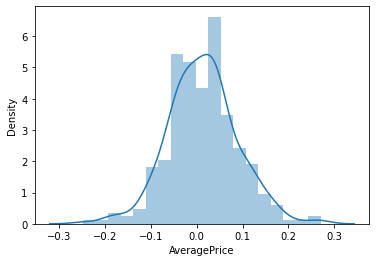

In [160]:
sns.distplot(rf_predictions-y_test)

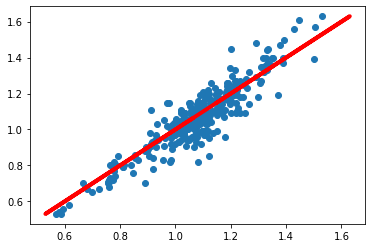

In [161]:
plt.scatter(rf_predictions,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# 6.SAVING THE MODEL

In [162]:
import joblib
joblib.dump(rf,"final model.pkl")

['final model.pkl']